# KNN Lab

## 准备工作
### 环境准备
请确保完成以下依赖包的安装，并且通过下面代码来导入与验证。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(12)

### 数据集准备
为了进行实验，我们提供了一个包含三个簇的训练样本集。该数据集包含两个特征（features），以及一个标签 y。

请执行以下代码以加载数据集并进行可视化。

In [2]:
from data_generator import gen_2D_dataset

# define the centers of different classes
centers = [[1, 1], [-1, -1], [1, -1]]
# define the number of samples
n_samples = 500
cluster_std = 0.8

# generate the dataset
x_train, y_train = gen_2D_dataset(centers, n_samples, cluster_std)
x_test, y_test = gen_2D_dataset(centers, 100, cluster_std)


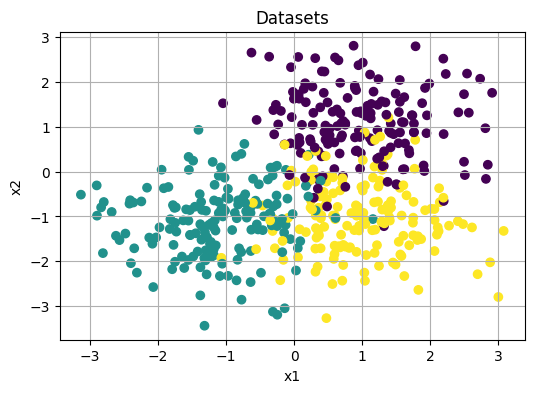

In [3]:
from vis_util import visualize_2D_dataset

# visualize the dataset
visualize_2D_dataset(x_train, y_train)


## KNN (10 pts)

KNN 算法的核心思想是利用距离待预测点最近的$K$个样本数据的分类来代表/预测目标数据的分类。

请你首先完成以下函数：

1. **定义距离函数（Distance Function）：** 在这里，我们将采用欧式距离。
2. **利用 KNN 算法进行预测。**

你将需要使用到 `numpy` 库，可以参考 [NumPy 官方文档](https://numpy.org/doc/stable/user/index.html) 。

你可能会用到的函数包括：`numpy.sum()`、`numpy.sqrt()`、`sort()`、`max()` 等。

In [4]:
# TODO: Implement a function to compute the Euclidean distance between two data points.
def euclidean_distance(x1, x2):
    """
    Compute the Euclidean distance between two data points.

    Parameters:
    - x1, x2: two data points to compute the distance.

    Returns:
    - float: the Euclidean distance between point1 and point2.
    """
    # TODO: First, compute the squared distance between two points
    sqrdis = np.sum((x1-x2) ** 2)
    # TODO: Second, compute the square root of the squared distance
    dis = np.sqrt(sqrdis)
    return dis
    pass


In [5]:
# TODO: Use KNN to classify the data points in the test set.

def KNN_predict(x_train, y_train, x_test, k):
    '''
    Predict the labels for x_test using KNN.

    Parameters:
    - x_train: training data
    - y_train: labels for training data
    - x_test: test data
    - k: number of neighbors to consider

    Returns:
    - predictions: list of predicted labels for x_test

    '''
    predictions = []
    for test_point in x_test:
        distances = []
        # compute the distance between the test point and all training points
        for i, train_point in enumerate(x_train):
            # TODO: invoke the function euclidean_distance to compute the distance between two points
            distance = euclidean_distance(test_point,train_point)
            # store the distance
            distances.append((i, distance))

        # TODO: sort the distances
        distances.sort(key=lambda x: x[1])

        # get the labels of the k nearest neighbor training samples
        top_k_labels = [y_train[distance[0]] for distance in distances[:k]]

        # select the most common class label among them
        prediction = max(set(top_k_labels), key=top_k_labels.count)
        predictions.append(prediction)

    return predictions



完成上述代码后，你可以自行设置$K$的大小，对测试数据集进行预测，并计算准确率。

In [17]:
# Set the number of neighbors and compute the accuracy of test data.
k = 14
y_pred = KNN_predict(x_train, y_train, x_test, k)
acc = (np.sum(y_test == y_pred) / len(y_test)) * 100

print("Test accuracy: {}".format(acc))

Test accuracy: 84.0
